In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import sys

sys.path.append("..")

<IPython.core.display.Javascript object>

In [4]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'

<IPython.core.display.Javascript object>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from models import LIF, LIF_Ref_Period, LIF_Spike_Rate_Adaption
from util.spike_trains import get_poisson_spike_train

<IPython.core.display.Javascript object>

In [21]:
plt.rcParams["figure.figsize"] = (12, 6)
fig_dir = "../figures"

<IPython.core.display.Javascript object>

In [17]:
dt = 0.1
size = 5000
spike_train = np.zeros(size - 1)
spike_train[1000:2000:2] = 40
spike_train[3000:4000:2] = 40

<IPython.core.display.Javascript object>

In [8]:
poisson_spike_trains = get_poisson_spike_train(500, size - 1, 1, dt)
p_spike_train = poisson_spike_trains[:, 0]
p_spike_train *= 5

<IPython.core.display.Javascript object>

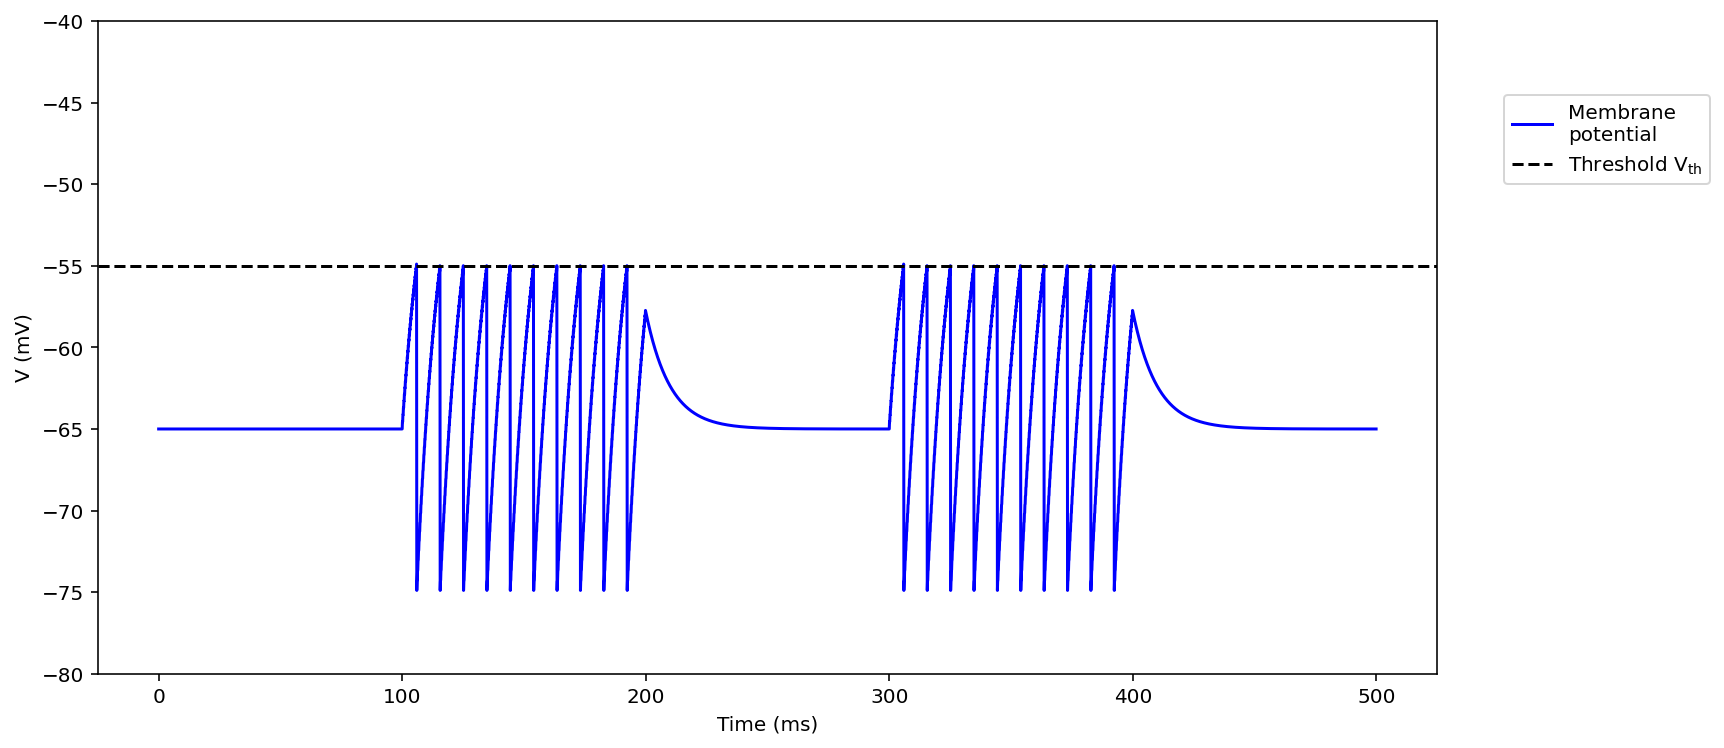

<IPython.core.display.Javascript object>

In [42]:
lif = LIF(dt=dt)
lif.insert_spike_train(spike_train)
lif.plot(size)
plt.savefig(
    f"{fig_dir}/lif.png",
    format="png",
    bbox_inches="tight",
    dpi=150,
    facecolor=(1, 1, 1),
)

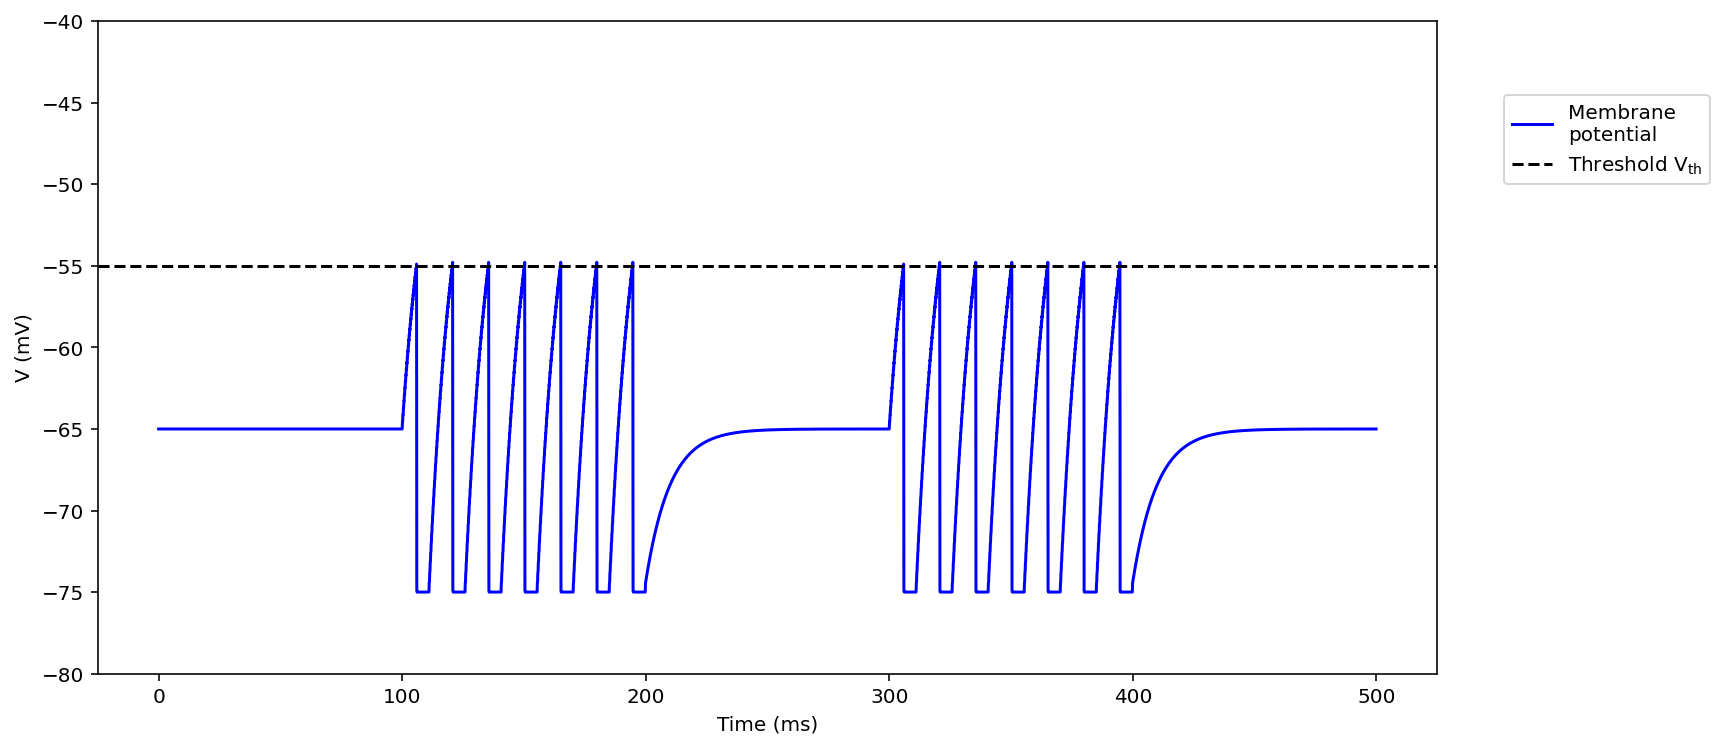

<IPython.core.display.Javascript object>

In [43]:
lif_ref_per = LIF_Ref_Period(t_ref=5, dt=dt)
lif_ref_per.insert_spike_train(spike_train)
lif_ref_per.plot(size)
plt.savefig(
    f"{fig_dir}/lif_ref_period.png",
    format="png",
    bbox_inches="tight",
    dpi=150,
    facecolor=(1, 1, 1),
)

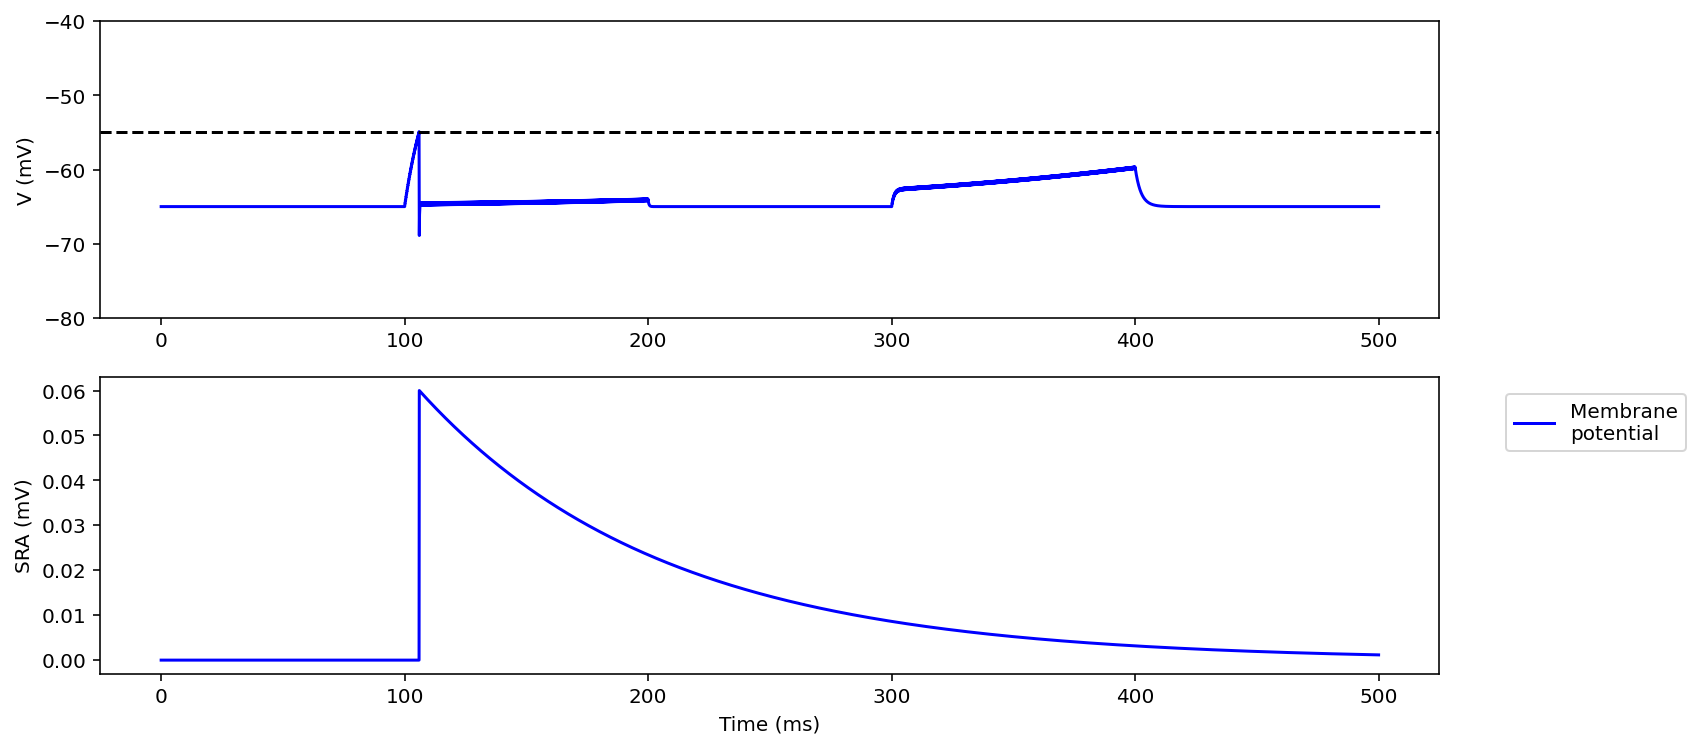

<Figure size 864x432 with 0 Axes>

<IPython.core.display.Javascript object>

In [56]:
lif_sra = LIF_Spike_Rate_Adaption(dt=dt, g_delta=0.06)
lif_sra.insert_spike_train(spike_train)

lif_sra.plot(size)
plt.savefig(
    f"{fig_dir}/lif_sra.png",
    format="png",
    bbox_inches="tight",
    dpi=150,
    facecolor=(1, 1, 1),
)

In [55]:
lif_sra.plot_spikes(size)

ValueError: No spike times recorded

<IPython.core.display.Javascript object>

In [53]:
@widgets.interact(
    g_delta=widgets.FloatSlider(0.06, min=0.001, max=1.0, step=0.01),
    tau_g=widgets.FloatSlider(100.0, min=5, max=200, step=5),
    tau_m=widgets.FloatSlider(100.0, min=5, max=200, step=5),
)
def lif_rsa_tau_g(g_delta=0.06, tau_g=100.0, tau_m=10.0):
    lif_sra = LIF_Spike_Rate_Adaption(dt=dt, g_delta=g_delta, tau_g=tau_g, tau_m=tau_m)
    lif_sra.insert_spike_train(spike_train)
    lif_sra.plot(size)
    lif_sra.plot_spikes(size)

interactive(children=(FloatSlider(value=0.06, description='g_delta', max=1.0, min=0.001, step=0.01), FloatSlid…

<IPython.core.display.Javascript object>